In [19]:
import os
import sys
import traceback

In [32]:
file_path = [r'C:\Users\Lenovo\deeplearningproject\requirements_de.txt',r'C:\Users\Lenovo\deeplearningproject\requirements.txt'] 
try:
    for file in file_path:
        with open(file,'r')as f:
            print("Yes")
except Exception as e:
    #print(file,"|",sys.exc_info())
    #traceback.print_tb()
    exc_type,exc_value,exc_tb = sys.exc_info()
    print(file,"|",(exc_type,exc_value))
    #traceback.print_tb(exc_tb)
    print(exc_tb.tb_frame,exc_tb.tb_lineno,exc_tb.tb_lasti)
    print(exc_tb.tb_frame.f_code.co_filename)
    file_name: str = os.path.split(exc_tb.tb_frame.f_code.co_filename)[1]
    print(file_name)

C:\Users\Lenovo\deeplearningproject\requirements_de.txt | (<class 'FileNotFoundError'>, FileNotFoundError(2, 'No such file or directory'))
<frame at 0x000001FC0C49EF90, file 'C:\\Users\\Lenovo\\AppData\\Local\\Temp\\ipykernel_4612\\1977213077.py', line 12, code <module>> 4 18
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4612\1977213077.py
1977213077.py


In [35]:
import os
import sys

def error_messge_detail(error:Exception, error_detail:sys):
    _,_,exc_tb = error_detail.exc_info()

    file_name: str = os.path.split(exc_tb.tb_frame.f_code.co_filename)[1]

    error_message = "Error occured in python script name [{0}] line number [{1}] error message [{2}]".format(
        file_name, exc_tb.tb_lineno, str(error)
    )

    return error_message;


class XRayExceptions(Exception):
    def __init__(self,error_message,error_detail:sys):
        super().__init__(error_message)
        self.error_message = error_messge_detail(error_message,error_detail)
    def __str__(self):
        return self.error_message

In [36]:
import os
import sys
from Xray.exceptions import XRayExceptions

def function_that_raises():
    try:
        1/0
    except Exception as e:
        raise XRayExceptions(e,sys)
    
def function_that_raises_convert_error():
    try:
        int("abc")
    except Exception as e:
        raise XRayExceptions(e,sys)
    
#function_that_raises()
print()
#function_that_raises_convert_error()
for fun in [function_that_raises, function_that_raises_convert_error]:
    try:
        fun()
    except XRayExceptions as xe:
        print(xe)


Error occured in python script name [2059867864.py] line number [7] error message [division by zero]
Error occured in python script name [2059867864.py] line number [13] error message [invalid literal for int() with base 10: 'abc']


In [45]:
import os
import numpy as np
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [6]:
os.getcwd()

'c:\\Users\\Lenovo\\deeplearningproject\\experiment'

In [9]:
os.chdir("C:/Users/Lenovo/deeplearningproject/artifacts/10_29_2025_12_19_43\data_ingestion/data")

In [11]:
data_path = os.getcwd()

In [12]:
data_path

'C:\\Users\\Lenovo\\deeplearningproject\\artifacts\\10_29_2025_12_19_43\\data_ingestion\\data'

In [13]:
class_name = ["NORMAL","PNEUMONIA"]

In [14]:
def get_list_of_files(dir_name):
    files_list = os.listdir(dir_name)
    return files_list;

In [15]:
get_list_of_files(data_path)

['test', 'train']

In [17]:
get_list_of_files(data_path+'/train/')

['NORMAL', 'PNEUMONIA']

In [18]:
class_name[0]

'NORMAL'

In [19]:
data_path + '/train/'+class_name[0]

'C:\\Users\\Lenovo\\deeplearningproject\\artifacts\\10_29_2025_12_19_43\\data_ingestion\\data/train/NORMAL'

In [20]:
files_list_normal_train = get_list_of_files(data_path + '/train/'+class_name[0])

In [23]:
len(files_list_normal_train)

105

In [24]:
files_list_normal_train

['IM-0001-0001.jpeg',
 'IM-0003-0001.jpeg',
 'IM-0005-0001.jpeg',
 'IM-0006-0001.jpeg',
 'IM-0007-0001.jpeg',
 'IM-0009-0001.jpeg',
 'IM-0010-0001.jpeg',
 'IM-0011-0001-0001.jpeg',
 'IM-0011-0001-0002.jpeg',
 'IM-0011-0001.jpeg',
 'IM-0013-0001.jpeg',
 'IM-0015-0001.jpeg',
 'IM-0016-0001.jpeg',
 'IM-0017-0001.jpeg',
 'IM-0019-0001.jpeg',
 'IM-0021-0001.jpeg',
 'IM-0022-0001.jpeg',
 'IM-0023-0001.jpeg',
 'IM-0025-0001.jpeg',
 'IM-0027-0001.jpeg',
 'IM-0028-0001.jpeg',
 'IM-0029-0001.jpeg',
 'IM-0030-0001.jpeg',
 'IM-0031-0001.jpeg',
 'IM-0033-0001-0001.jpeg',
 'IM-0033-0001-0002.jpeg',
 'IM-0033-0001.jpeg',
 'IM-0035-0001.jpeg',
 'IM-0036-0001.jpeg',
 'IM-0037-0001.jpeg',
 'IM-0039-0001.jpeg',
 'IM-0041-0001.jpeg',
 'IM-0043-0001.jpeg',
 'IM-0045-0001.jpeg',
 'IM-0046-0001.jpeg',
 'IM-0049-0001.jpeg',
 'IM-0050-0001.jpeg',
 'IM-0059-0001.jpeg',
 'IM-0061-0001.jpeg',
 'IM-0063-0001.jpeg',
 'IM-0065-0001.jpeg',
 'IM-0067-0001.jpeg',
 'IM-0069-0001.jpeg',
 'IM-0070-0001.jpeg',
 'IM-0071-00

In [26]:
get_list_of_files(data_path+'/train/'+class_name[1]),len(get_list_of_files(data_path+'/train/'+class_name[1]))

(['person10_virus_35.jpeg',
  'person11_virus_38.jpeg',
  'person14_virus_44.jpeg',
  'person15_virus_46.jpeg',
  'person16_virus_47.jpeg',
  'person17_virus_48.jpeg',
  'person18_virus_49.jpeg',
  'person19_virus_50.jpeg',
  'person1_virus_11.jpeg',
  'person1_virus_12.jpeg',
  'person1_virus_13.jpeg',
  'person1_virus_6.jpeg',
  'person1_virus_7.jpeg',
  'person1_virus_8.jpeg',
  'person1_virus_9.jpeg',
  'person20_virus_51.jpeg',
  'person21_virus_52.jpeg',
  'person21_virus_53.jpeg',
  'person22_virus_54.jpeg',
  'person22_virus_55.jpeg',
  'person23_virus_56.jpeg',
  'person24_virus_58.jpeg',
  'person25_virus_59.jpeg',
  'person26_virus_60.jpeg',
  'person28_virus_62.jpeg',
  'person28_virus_63.jpeg',
  'person29_virus_64.jpeg',
  'person30_virus_69.jpeg',
  'person31_virus_70.jpeg',
  'person32_virus_71.jpeg',
  'person33_virus_72.jpeg',
  'person34_virus_76.jpeg',
  'person35_virus_80.jpeg',
  'person36_virus_81.jpeg',
  'person37_virus_82.jpeg',
  'person38_virus_83.jpeg',
  '

In [30]:
train_normal_class = get_list_of_files(data_path+'/train/'+class_name[0])
train_pnuemonia_class = get_list_of_files(data_path+'/train/'+class_name[1])

In [31]:
len(train_normal_class),len(train_pnuemonia_class)

(105, 105)

In [32]:
data_path

'C:\\Users\\Lenovo\\deeplearningproject\\artifacts\\10_29_2025_12_19_43\\data_ingestion\\data'

In [34]:
test_normal_class = get_list_of_files(data_path+"/test/"+class_name[0])
test_pnemonia_class = get_list_of_files(data_path+"/test/"+class_name[1])

In [36]:
len(test_normal_class),len(test_pnemonia_class)

(30, 30)

In [38]:
print("Number of train samples in Normal category {}".format(len(get_list_of_files(data_path+'/train/'+class_name[0]))))
print("Number of train samples in disease category {}".format(len(get_list_of_files(data_path+'/train/'+class_name[1]))))
print("Number of test samples in Normal category {}".format(len(get_list_of_files(data_path+'/test/'+class_name[0]))))
print("Number of test samples in disease category {}".format(len(get_list_of_files(data_path+'/test/'+class_name[1]))))

Number of train samples in Normal category 105
Number of train samples in disease category 105
Number of test samples in Normal category 30
Number of test samples in disease category 30


In [60]:
random_image_number = np.random.randint(0,len(train_normal_class))

In [61]:
random_image_number

90

In [62]:
train_normal_class[:5]

['IM-0001-0001.jpeg',
 'IM-0003-0001.jpeg',
 'IM-0005-0001.jpeg',
 'IM-0006-0001.jpeg',
 'IM-0007-0001.jpeg']

In [47]:
import matplotlib.image as mpimg

(1936, 2345)


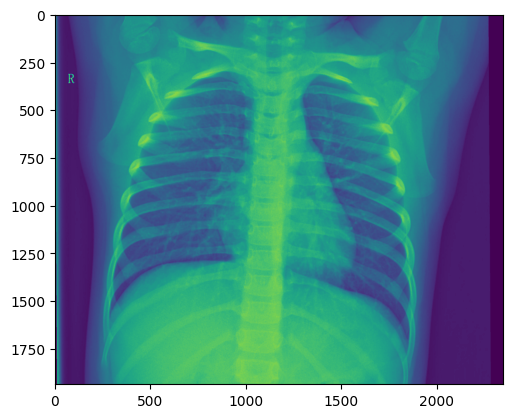

In [68]:
img = data_path + "/train/NORMAL/"+train_normal_class[random_image_number]
print(plt.imread(img).shape)
img = mpimg.imread(img)
imgplot = plt.imshow(img)
plt.show()

In [53]:
class_name[1]

'PNEUMONIA'

C:\Users\Lenovo\deeplearningproject\artifacts\10_29_2025_12_19_43\data_ingestion\data/train/PNEUMONIA/person3_virus_17.jpeg
(1120, 1344)


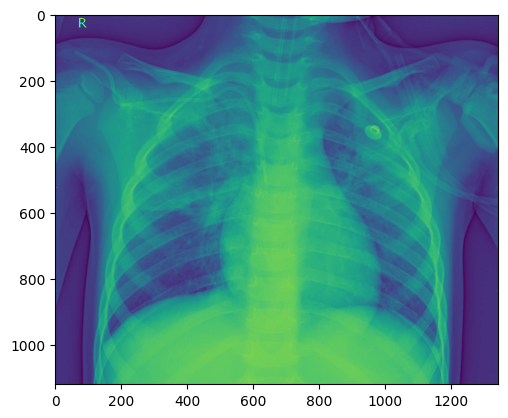

In [67]:
img = data_path + "/train/PNEUMONIA/"+train_pnuemonia_class[np.random.randint(0,len(train_pnuemonia_class))]
print(img)
print(plt.imread(img).shape)
img = mpimg.imread(img)
imgplot = plt.imshow(img)
plt.show()

C:\Users\Lenovo\deeplearningproject\artifacts\10_29_2025_12_19_43\data_ingestion\data/test/NORMAL/IM-0010-0001.jpeg
(1478, 1873)


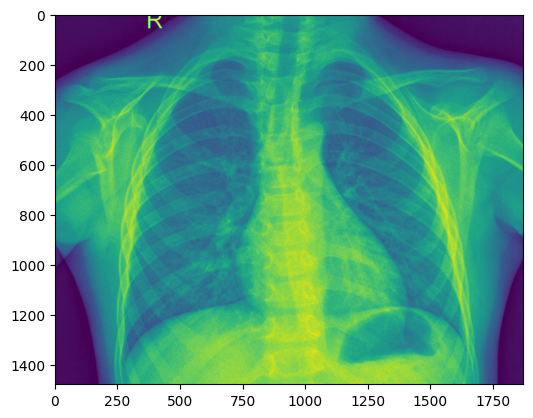

In [71]:
# test normal lungs
img = data_path + "/test/NORMAL/"+test_normal_class[np.random.randint(0,len(test_normal_class))]
print(img)
print(plt.imread(img).shape)
img = mpimg.imread(img)
imgplot = plt.imshow(img)
plt.show()

C:\Users\Lenovo\deeplearningproject\artifacts\10_29_2025_12_19_43\data_ingestion\data/test/PNEUMONIA/person3_virus_16.jpeg
(848, 1256)


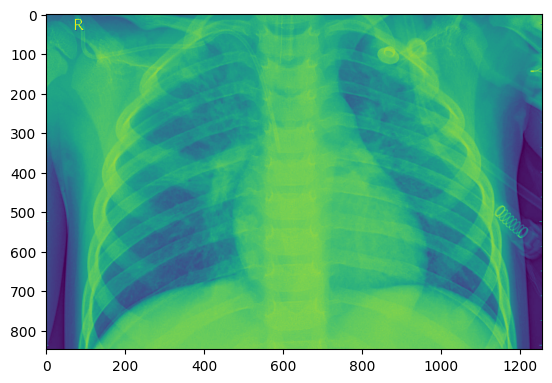

In [72]:
# test pneumonia lungs
img = data_path + "/test/PNEUMONIA/"+test_pnemonia_class[np.random.randint(0,len(test_pnemonia_class))]
print(img)
print(plt.imread(img).shape)
img = mpimg.imread(img)
imgplot = plt.imshow(img)
plt.show()

## Transforming the images
- lets create synthetic data by data augmentation on both train and test images.

In [92]:
from PIL import Image
from torchvision import transforms

## RESIZE

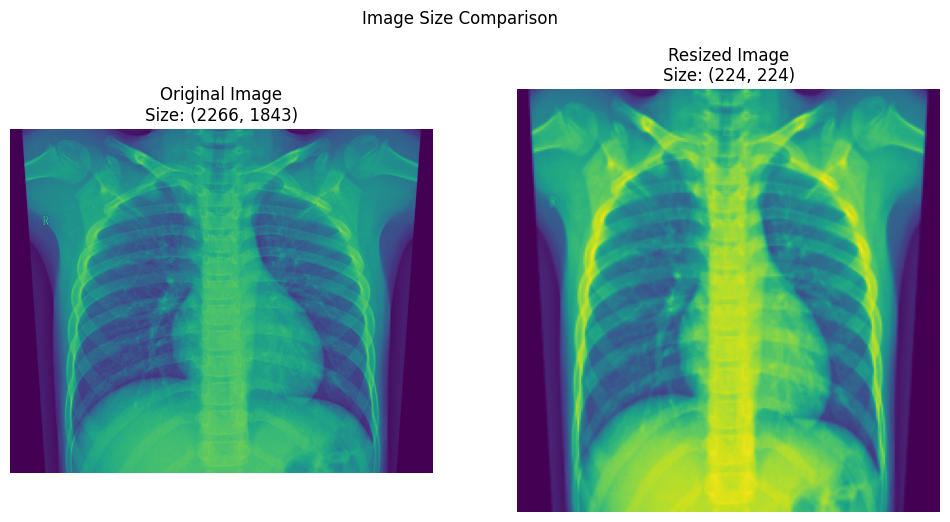

Original image size: (2266, 1843)
Resized image size: (224, 224)


In [97]:
from PIL import Image
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np

image = Image.open(data_path + "/train/NORMAL/" + train_normal_class[np.random.randint(0, len(train_normal_class))])

resize_transform = transforms.Resize((224, 224))
resized_img = resize_transform(image)

plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.title("Original Image\nSize: {}".format(image.size))
plt.imshow(image)
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Resized Image\nSize: {}".format(resized_img.size))
plt.imshow(resized_img)
plt.axis("off")

plt.suptitle("Image Size Comparison")
plt.show()

print("Original image size:", image.size)
print("Resized image size:", resized_img.size)


## COLORJITTER

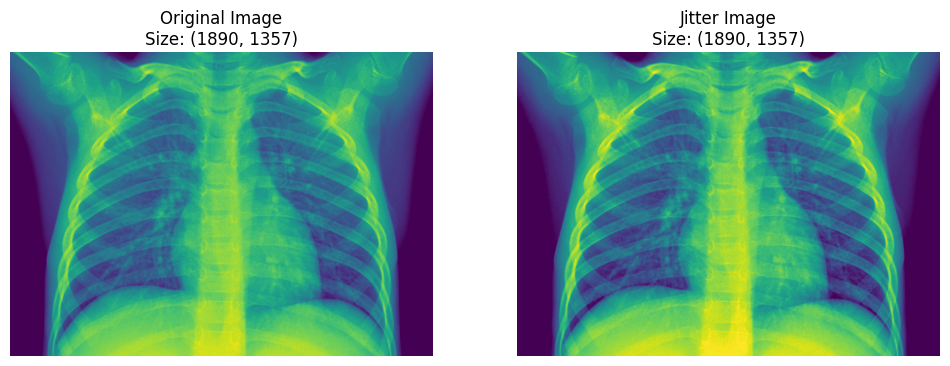

In [100]:
image = Image.open(data_path+"/train/NORMAL/"+train_normal_class[np.random.randint(0,len(train_normal_class))])
color_jitter = transforms.ColorJitter(
    brightness=0.2,
    contrast=0.2,
    saturation=0.2,
    hue=0.2,
)

jittered_image = color_jitter(image)
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Original Image\nSize: {}".format(image.size))
plt.imshow(image)
plt.axis("off")

plt.subplot(1,2,2)
plt.title("Jitter Image\nSize: {}".format(jittered_image.size))
plt.imshow(jittered_image)
plt.axis('off')

plt.show()

## CENTERCROP

## RANDOMHORIZONTALFLIP

## RANDOMROTATION

## NORMALIZATION

In [85]:
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cpu


In [86]:
print(torch.cuda.is_available())
print(torch.version.cuda)

False
None
